In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**First we will load the given dataset.**

In [101]:
df = pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [102]:
df.shape

(32561, 15)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [104]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


**Since there are no null values, we are not performing imputation.**

**Here is the summary statistics for the given dataset, which includes only numericals variables.**

In [105]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**From the above summary we infer that columns capital_gain and capital_loss huge dispersion from the maximum and minimum values.**

<ipython-input-106-dd8dea6d8a9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["capital_gain"])


<Axes: xlabel='capital_gain', ylabel='Density'>

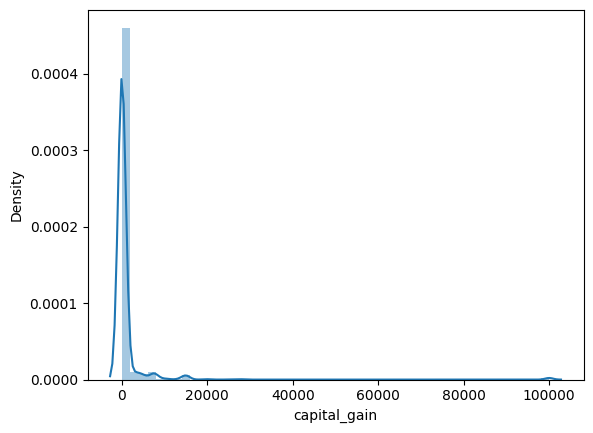

In [106]:
sns.distplot(df["capital_gain"])

<ipython-input-107-6a8266021dc8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["capital_loss"])


<Axes: xlabel='capital_loss', ylabel='Density'>

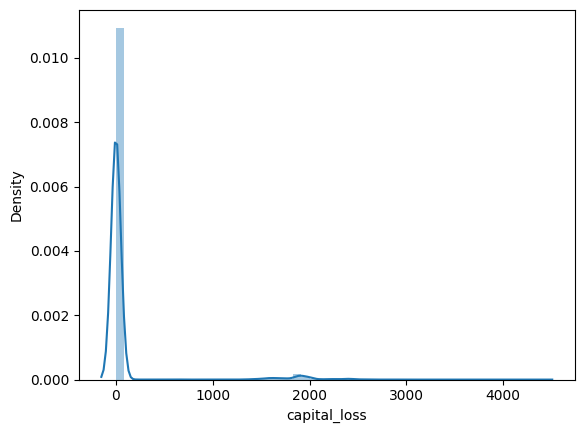

In [107]:
sns.distplot(df["capital_loss"])

**From the above distribution plot for the capital_gain and capital_loss the data is been skewed (Right Skew).**

In [108]:
df["income"].value_counts()

,income
<=50K,24720
>50K,7841


In [109]:
df["education"].value_counts()

,education
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646
Prof-school,576


In [110]:
X = df.drop(columns=['income'])
y = df['income']

**We will split the data into training and testing data. Where training is of 80% and testing is 20%.**

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048,), (6513,))

**We will try to select the categorical and numerical columns for the dataframe X_train.**

In [113]:
cat_cols = X_train.select_dtypes(include=['object']).columns
num_cols = X_train.select_dtypes(include=['int64','float64']).columns

In [114]:
num_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [115]:
for col in cat_cols:
  print(f"{col}: {X_train[col].nunique()}")

workclass: 9
education: 16
marital_status: 7
occupation: 15
relationship: 6
race: 5
sex: 2
native_country: 42


**We import preprocessing techniques from the sci-kit learn.**

In [116]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder

In [117]:
ordinal_cols = ['education']
label_cols = ['workclass','marital_status','occupation','native_country']
onehot_cols = [col for col in cat_cols if col not in ordinal_cols and col not in label_cols]

Since there are many categorical variables, We perform the encoding.

**Ordinal encoding** for the education column since it is ordinal data.

**OneHot encoding** for the other categorical columns which are less than 5 categories.

Basically **Label encoing** is performed on the target varibles. Since we have many categories for some of the columns, we perform label encoding for columns which are more than 5 categories

In [118]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_ordinal = pd.DataFrame(oe.fit_transform(X_train[ordinal_cols]), columns=oe.get_feature_names_out(ordinal_cols))
X_test_ordinal = pd.DataFrame(oe.transform(X_test[ordinal_cols]), columns=oe.get_feature_names_out(ordinal_cols))

In [119]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_onehot = pd.DataFrame(ohe.fit_transform(X_train[onehot_cols]), columns=ohe.get_feature_names_out(onehot_cols))
X_test_onehot = pd.DataFrame(ohe.transform(X_test[onehot_cols]), columns=ohe.get_feature_names_out(onehot_cols))

In [120]:
le = LabelEncoder()
for col in label_cols:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

**Pros and Cons of Label and OneHot Encoding.**

These both are two common techniques used to handle categorical data.

**Label Encoding**

Pros:

**Simplicity:** Easy to implement and requires minimal preprocessing.

**Memory Efficient:** Uses minimal memory because it encodes categories as integer values, unlike One-Hot Encoding which increases the number of features.

Cons:

**Implicit Ordinality:** Assumes an ordinal relationship between categories, which can mislead non-tree models like linear models, which may interpret the encodings as ordered relationships.

**Poor Performance on Non-Ordinal Data:** Can result in poor performance if applied to nominal data, as the model might mistakenly assign importance to the order of the numbers.

**One-Hot Encoding**

Pros:

**No Assumption of Ordinality:** Suitable for nominal data, as it treats each category as independent without implying any order.

**Avoids Misinterpretation:** Prevents the model from interpreting relationships between encoded categories since each category is represented as a separate feature.

Cons:

**High Dimensionality:** Increases the feature space significantly, especially when dealing with high-cardinality features, which can lead to increased computational costs and potential overfitting.

**Memory Inefficient:** Memory consumption can be high due to the many additional columns generated, especially when the dataset has many categorical features with numerous unique values.

Standard scaling is applied when the data is normally distributed.

Minmax scaling is applied when the data is applied when upper and lowe boundries are well known.

In the given data we perform,

Standard scaling for capital_gain and capital_loss columns, since we are going to perform log transformation.

And we will apply Minmax scaling for the remaining numerical features.



In [121]:
minmax_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week']

In [122]:
standard_cols = ['capital_gain', 'capital_loss']

In [123]:
scaler = StandardScaler()
X_train_standard = pd.DataFrame(scaler.fit_transform(X_train[standard_cols]), columns=standard_cols)
X_test_standard = pd.DataFrame(scaler.transform(X_test[standard_cols]), columns=standard_cols)

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
X_train_minmax = pd.DataFrame(scaler1.fit_transform(X_train[minmax_cols]), columns=minmax_cols)
X_test_minmax = pd.DataFrame(scaler1.fit_transform(X_test[minmax_cols]), columns=minmax_cols)

In [125]:
# Combine all processed features: numerical, ordinal, and one-hot encoded features
X_train_processed = pd.concat([X_train_standard, X_train_minmax ,X_train_ordinal, X_train_onehot, X_train[label_cols]], axis=1)
X_test_processed = pd.concat([X_test_standard, X_test_minmax, X_test_ordinal, X_test_onehot, X_test[label_cols]], axis=1)

In [126]:
print("Processed Training Data:")
print(X_train_processed.head())

Processed Training Data:
   capital_gain  capital_loss       age    fnlwgt  education_num  \
0     -0.145319     -0.217362  0.205479  0.016928       0.800000   
1     -0.145319     -0.217362  0.356164  0.060896       0.866667   
2     -0.145319     -0.217362  0.041096  0.074679       0.533333   
3      0.793028     -0.217362  0.315068  0.008474       0.600000   
4     -0.145319     -0.217362  0.095890  0.069037       0.800000   

   hours_per_week  education  relationship_ Husband  \
0        0.448980        9.0                    1.0   
1        0.448980       12.0                    0.0   
2        0.275510       11.0                    0.0   
3        0.397959       15.0                    0.0   
4        0.397959        9.0                    0.0   

   relationship_ Not-in-family  relationship_ Other-relative  ...  \
0                          0.0                           0.0  ...   
1                          1.0                           0.0  ...   
2                          1

In [127]:
print("\nProcessed Test Data:")
print(X_test_processed.head())


Processed Test Data:
   capital_gain  capital_loss       age    fnlwgt  education_num  \
0     -0.145319     -0.217362  0.191781  0.073181       1.000000   
1     -0.145319     -0.217362  0.041096  0.135204       0.600000   
2      1.140609     -0.217362  0.835616  0.271649       0.800000   
3     -0.145319     -0.217362  0.205479  0.107512       0.800000   
4     -0.145319     -0.217362  0.602740  0.054415       0.533333   

   hours_per_week  education  relationship_ Husband  \
0        0.397959       10.0                    0.0   
1        0.397959       15.0                    0.0   
2        0.448980        9.0                    1.0   
3        0.438776        9.0                    1.0   
4        0.020408       11.0                    1.0   

   relationship_ Not-in-family  relationship_ Other-relative  ...  \
0                          0.0                           0.0  ...   
1                          0.0                           0.0  ...   
2                          0.0 

In [128]:
X_train_processed.shape

(31179, 24)

In [129]:
X_train_processed.columns

Index(['capital_gain', 'capital_loss', 'age', 'fnlwgt', 'education_num',
       'hours_per_week', 'education', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Female', 'sex_ Male', 'workclass', 'marital_status', 'occupation',
       'native_country'],
      dtype='object')

In [130]:
X_train_processed.head()

,capital_gain,capital_loss,age,fnlwgt,education_num,hours_per_week,education,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,workclass,marital_status,occupation,native_country
0,-0.145319,-0.217362,0.205479,0.016928,0.800000,0.448980,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,7.0,4.0,1.0,39.0
1,-0.145319,-0.217362,0.356164,0.060896,0.866667,0.448980,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,6.0,2.0,4.0,39.0
2,-0.145319,-0.217362,0.041096,0.074679,0.533333,0.275510,11.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,6.0,39.0
3,0.793028,-0.217362,0.315068,0.008474,0.600000,0.397959,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,6.0,39.0
4,-0.145319,-0.217362,0.095890,0.069037,0.800000,0.397959,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,10.0,5.0


**Applying log transformation for the capital_gain and capital_loss columns since they both are more skewed.**

In [131]:
# Apply log transformation to capital_gain and capital_loss
X_train_processed['capital_gain'] = np.log1p(X_train_processed['capital_gain'])
X_train_processed['capital_loss'] = np.log1p(X_train_processed['capital_loss'])

X_test_processed['capital_gain'] = np.log1p(X_test_processed['capital_gain'])
X_test_processed['capital_loss'] = np.log1p(X_test_processed['capital_loss'])

In [132]:
X_train_processed.head()

,capital_gain,capital_loss,age,fnlwgt,education_num,hours_per_week,education,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,workclass,marital_status,occupation,native_country
0,-0.157027,-0.245085,0.205479,0.016928,0.800000,0.448980,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,7.0,4.0,1.0,39.0
1,-0.157027,-0.245085,0.356164,0.060896,0.866667,0.448980,12.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,6.0,2.0,4.0,39.0
2,-0.157027,-0.245085,0.041096,0.074679,0.533333,0.275510,11.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,6.0,39.0
3,0.583906,-0.245085,0.315068,0.008474,0.600000,0.397959,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,6.0,39.0
4,-0.157027,-0.245085,0.095890,0.069037,0.800000,0.397959,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,10.0,5.0


In [133]:
X_train_processed.isnull().sum()

,0
capital_gain,5131
capital_loss,5131
age,5131
fnlwgt,5131
education_num,5131
hours_per_week,5131
education,5131
relationship_ Husband,5131
relationship_ Not-in-family,5131
relationship_ Other-relative,5131


In [134]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_processed = pd.DataFrame(imputer.fit_transform(X_train_processed), columns=X_train_processed.columns)

In [135]:
imputer1 = SimpleImputer(strategy='mean')
X_test_processed = pd.DataFrame(imputer1.fit_transform(X_test_processed), columns=X_test_processed.columns)

In [136]:
X_test_processed.head()

,capital_gain,capital_loss,age,fnlwgt,education_num,hours_per_week,education,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,workclass,marital_status,occupation,native_country
0,-0.157027,-0.245085,0.191781,0.073181,1.000000,0.397959,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.868724,2.614463,6.521112,36.718716
1,-0.157027,-0.245085,0.041096,0.135204,0.600000,0.397959,15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.868724,2.614463,6.521112,36.718716
2,0.761090,-0.245085,0.835616,0.271649,0.800000,0.448980,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.868724,2.614463,6.521112,36.718716
3,-0.157027,-0.245085,0.205479,0.107512,0.800000,0.438776,9.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.868724,2.614463,6.521112,36.718716
4,-0.157027,-0.245085,0.602740,0.054415,0.533333,0.020408,11.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,3.868724,2.614463,6.521112,36.718716


In [137]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [138]:
y_train_df = pd.DataFrame(y_train_encoded)
y_test_df = pd.DataFrame(y_test_encoded)

In [139]:
y_train_df

,0
0,1
1,0
2,0
3,0
4,0
...,...
26043,0
26044,0
26045,0
26046,0


**Usually Isolation forest algorithm is used for unsupervised learning, any we apply it here to detect the outliers for both the training and test data.**

In [140]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=0.05, random_state=42)

In [141]:
model.fit(X_train_processed)

IsolationForest(contamination=0.05, random_state=42)

In [142]:
y_train_pred = model.predict(X_train_processed)

In [143]:
outliers_train = X_train_processed[y_train_pred == -1]

In [144]:
y_test_pred = model.predict(X_test_processed)
outliers_test = X_test_processed[y_test_pred == -1]

In [145]:
print("Number of outliers in training data:", len(outliers_train))
print("Number of outliers in test data:", len(outliers_test))

Number of outliers in training data: 1559
Number of outliers in test data: 279


Outliers can negatively affect a model's performance in many ways like Skewed data, Overfitting, Increased error and Biased results.

**Skewed Data:** Outliers can skew the distribution of the data, leading to inaccurate estimations of parameters.

**Overfitting:** The model might overfit to the outliers, trying to accommodate them, which leads to poor generalization to new, unseen data.

**Increased Error:** Outliers can increase the error of the model, as they deviate significantly from the general trend of the data.

**Biased Results:** In some cases, outliers can bias the model's results, leading to inaccurate predictions.


**Applying PPS to find the relationship between the features.**

In [146]:
!pip install ppscore

In [147]:
import ppscore as pps

pps_matrix = pps.matrix(X_train_processed)
print(pps_matrix)

                  x               y   ppscore            case  is_valid_score  \
0      capital_gain    capital_gain  1.000000  predict_itself            True   
1      capital_gain    capital_loss  0.000000      regression            True   
2      capital_gain             age  0.010702      regression            True   
3      capital_gain          fnlwgt  0.000000      regression            True   
4      capital_gain   education_num  0.016964      regression            True   
..              ...             ...       ...             ...             ...   
571  native_country       sex_ Male  0.000000      regression            True   
572  native_country       workclass  0.000000      regression            True   
573  native_country  marital_status  0.000000      regression            True   
574  native_country      occupation  0.000000      regression            True   
575  native_country  native_country  1.000000  predict_itself            True   

                  metric  b